<a href="https://colab.research.google.com/github/minerva12938/ai_notes_s22/blob/main/exercise_scaling_and_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, you'll apply what you learned in the **Scaling and normalization** tutorial.






The next code cell loads in the libraries and dataset we'll be using. 

In [12]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

Let's start by scaling the goals of each campaign, which is how much money they were asking for.  After scaling, all values lie between 0 and 1.

In [13]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


# 1) Practice scaling

We just scaled the "usd_goal_real" column. What about the "goal" column?

Begin by running the code cell below to create a DataFrame `original_goal_data` containing the "goal" column.

In [14]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

Use `original_goal_data` to create a new DataFrame `scaled_goal_data` with values scaled between 0 and 1. You must use the `minmax_scaling()` function.

# 2) Practice normalization

Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

In [15]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


The values have changed significantly with normalization!

In the next code cell, you'll take a look at the distribution of the normalized data, where it should now resemble a normal distribution.

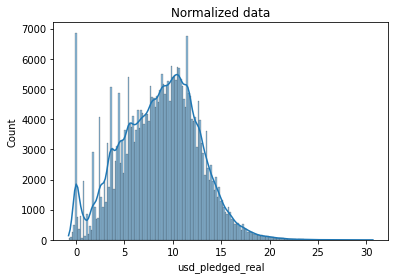

In [16]:
# plot normalized data
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()

We used the "usd_pledged_real" column. Follow the same process to normalize the "pledged" column. 

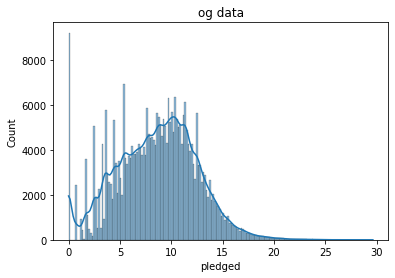

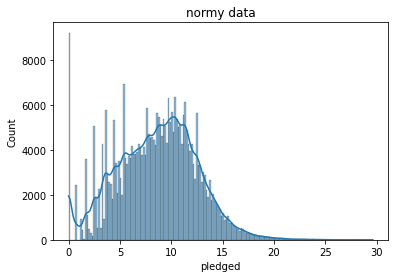

In [17]:
# get positive values' indecies
pos_pledged_index = kickstarters_2017.pledged > 0

# get positive values using indecies from ^^
pos_pleadges = kickstarters_2017.pledged.loc[pos_pledged_index]

# normalize pledges (w/ Box-Cox)
normy_pledge = pd.Series(stats.boxcox(pos_pleadges)[0], 
                               name='pledged', index=pos_pleadges.index)

# plot normalized data
ax = sns.histplot(normy_pledge, kde=True)
ax.set_title("normy data")
plt.show()

How does the normalized "usd_pledged_real" column look different from when we normalized the "pledged" column?  Or, do they look mostly the same?

Once you have an answer, run the code cell below.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-cleaning/discussion) to chat with other learners.*